# Instalaciones

In [ ]:
pip install opencv-contrib-python

In [ ]:
pip install caer

# Importaciones

In [1]:
import cv2 as cv

# Reading Images And Video

### Reading images

In [4]:
img = cv.imread('Resources/Photos/cat_large.jpg') # Devuelve la imagen como una matriz de pixeles

cv.imshow('Cat', img) #Muestra la imagen. Params:(nombre de la ventana, imagen a mostrar)

cv.waitKey(0) #Delay hasta que se presione una letra

-1

### Reading Videos

In [ ]:
capture = cv.VideoCapture('Resources/Videos/dog.mp4') #El argumento 0 es la webcam
while True:
    isTrue, frame = capture.read()
    
    cv.imshow('Video', frame)
    
    if cv.waitKey(20) & 0xFF==ord('d'):
        break

capture.release()
cv.waitKey(0)

---

# Resize and Rescale Frames

### Rescale

In [3]:
def rescalesFrame(frame, scale=0.75):
    # Va  a funcionar para imagenes, videos y video en vivo
    width = int(frame.shape[1] * scale)
    height = int(frame.shape[0] * scale)
    dimensions = (width, height)
    
    return cv.resize(frame, dimensions, interpolation=cv.INTER_AREA)

In [ ]:
#Casi el mismo cell que el de reading videos
capture = cv.VideoCapture('Resources/Videos/dog.mp4') #El argumento 0 es la webcam
while True:
    isTrue, frame = capture.read()
    
    frame_resized = rescalesFrame(frame, scale = 0.2)
    
    cv.imshow('Video', frame)
    cv.imshow('Video Resized', frame_resized)
    
    if cv.waitKey(20) & 0xFF==ord('d'):
        break

capture.release()
cv.waitKey(0) 

In [2]:
#Casi el mismo cell que el de reading imgs
img = cv.imread('Resources/Photos/cat_large.jpg') # Devuelve la imagen como una matriz de pixeles
resized_img = rescalesFrame(img)

cv.imshow('Cat', img) #Muestra la imagen. Params:(nombre de la ventana, imagen a mostrar)
cv.imshow('Resized cat', resized_img) #Muestra la imagen. Params:(nombre de la ventana, imagen a mostrar)

cv.waitKey(0) #Delay hasta que se presione una letra

NameError: name 'rescalesFrame' is not defined

### Resize

In [ ]:
def changeRes(width, height):
    # Va  a funcionar para videos en vivo solamente
    capture.set(3, width)
    capture.set(4,height)

---

---

# Drawing shapes & putting text

#### Importaciones nuevamente

In [4]:
import cv2 as cv
import numpy as np

In [ ]:
blank = np.zeros((500,500,3), dtype='uint8') #Params: (shape = (Height, Width, # color channels))
cv.imshow('Blank', blank)

# 1. Paint the image a certain color
blank[:] = 0,255,0
cv.imshow('Green', blank)

cv.waitKey(0)

Creo el blank

In [8]:
blank = np.zeros((500,500,3), dtype='uint8') #Params: (shape = (Height, Width, # color channels))
cv.imshow('Blank', blank)

 1. Paint the image a certain color

In [5]:
blank[200:300, 300:400] = 0,255,0 # Se le dio un tamaño a la figura
cv.imshow('Green', blank)

cv.imshow()

-1

2. Draw a Rectange

Funcion `cv.rectangle()` Si en thickness le paso cv.FILLED o -1, va a salir rellenito. Y si en size le paso (0,0), (blank.shhape[1]//2, blank.shape[0]//2), (0,255,0) -> va a ser el primer cuarto del rectangulo


In [7]:
cv.rectangle(blank, (0,0), (250,250), (0,255,0), thickness=2) 
cv.imshow('Rectangle', blank)

cv.waitKey(0)

-1

3. Draw a circle

In [ ]:
cv.circle(blank, (blank.shape[1]//2, blank.shape[0]//2), 40, (0,0,255), thickness=3) 
cv.imshow('Circle', blank)

cv.waitKey(0)

-1

4. Draw a line


`cv.line(img, pt1, pt2, color, thickness=None, lineType=None, shift=None)`

In [11]:
cv.line(blank,(0,0) , (blank.shape[1]//2, blank.shape[0]//2), (255,255,255), thickness=3) 
cv.imshow('Line', blank)

cv.waitKey(0)

-1

5. Write Text

In [1]:
cv.putText(blank, 'Hello', (255,255), cv.FONT_HERSHEY_TRIPLEX, 1.0, (0,255,0),2)
cv.imshow('Text', blank)

cv.waitKey(0)

NameError: name 'cv' is not defined

---

---

---

# 5 basic functions in OpenCV

#### Importaciones

In [2]:
import cv2 as cv

In [6]:
img = cv.imread('Resources/Photos/park.jpg')
cv.imshow('Boston', img)

cv.waitKey(0) 

-1

## 1. Converting to grayscale

In [ ]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow('Gray', gray)

cv.waitKey(0) 

## 2. Blur

In [7]:
blur = cv.GaussianBlur(img, (3,3), cv.BORDER_DEFAULT) #Para que sea mas borroso en vez de (3,3) puedo usar (7,7)
cv.imshow('blur', blur)

cv.waitKey(0) 

-1

## 3. Edge Cascade

In [9]:
canny = cv.Canny(blur, 125, 175) # Para pasarle menos edges, en vez de img podemos pasarle blur
cv.imshow('Canny', canny)

cv.waitKey(0) 

-1

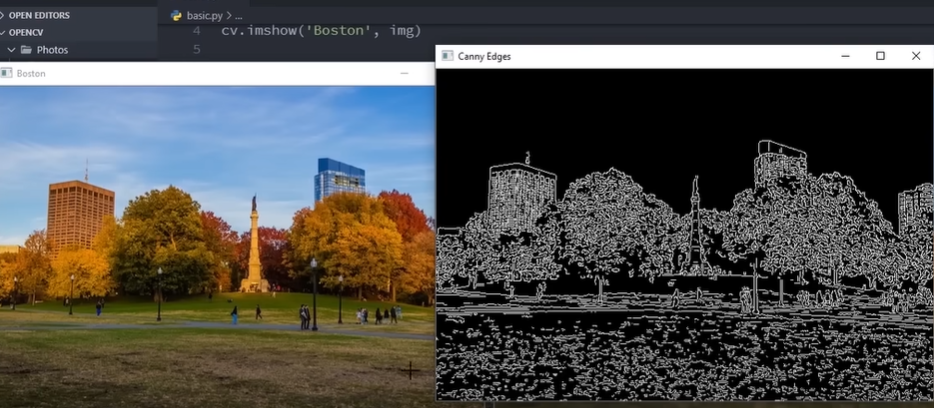

## 4. Dilating the image

Esto es util para dilatar los edges

In [11]:
dilated = cv.dilate(canny, (7,7), iterations=1)
cv.imshow('Dilated', dilated)

cv.waitKey(0)

-1

## 5. Eroding

In [12]:
eroded = cv.erode(dilated, (7,7), iterations=3)
cv.imshow('Eroded', eroded)

cv.waitKey(0)

-1

## 6. Resize

In [14]:
resized = cv.resize(img, (500,500), interpolation=cv.INTER_AREA)
cv.imshow('Resized', resized)

cv.waitKey(0)

-1

Interpolation:
- `cv.INTER_AREA` -> Util cuando se esta encogiendo al imagen
- `cv.INTER_LINEAR` -> Util cuando se agranda la imagen
- `cv.INTER_CUBIC` -> Util cuando se agranda la imagen, pero es mas lenta que la linear, pero tiene una mejor calidad

## 7. Cropping

In [15]:
cropped = img[50:200, 200:400]
cv.imshow('Cropped', cropped)

cv.waitKey(0)

-1

---

---

---

# Image Transformations

#### Importaciones

In [16]:
import cv2 as cv
import numpy as np

In [17]:
img = cv.imread('Resources/Photos/park.jpg')
cv.imshow('Boston', img)

cv.waitKey(0) 

-1

### Translation

In [21]:
def translate(img,x,y):
    transMat = np.float32([[1,0,x],[0,1,y]])
    dimensions = (img.shape[1], img.shape[0])
    return cv.warpAffine(img, transMat, dimensions)

Clave de params de `translate(img,x,y)`
- -x ---> Left
- -y ---> Up
- x ---> Rigth
- y ---> Down

In [22]:
translated = translate(img,100,100)
cv.imshow('Trans', translated)

cv.waitKey(0)

-1

### Rotation

In [25]:
def rotate(img, angle, rotPoint=None):
    (height,width) = img.shape[:2]
    
    if rotPoint is None:
        rotPoint = (width//2, height//2)
        
    rotMat = cv.getRotationMatrix2D(rotPoint, angle, 1.0)
    dimensions = (width, height)
    
    return cv.warpAffine(img, rotMat, dimensions)

In [26]:
rotated = rotate(img,45)
cv.imshow('Rotated', rotated)

cv.waitKey(0)

-1

### Resizing

Ya se ha hecho esto multiples veces entonces lo voy a skipear

### Flipping
- Vertical flip -> 0
- Horizontal flip -> 1
- Both at the same time -> -1

In [27]:
flip = cv.flip(img, 0)
cv.imshow('Flipped', flip)

cv.waitKey(0)

-1

### Cropping
Ya se hizo multiples veces, lo voy a omitir

---

---

# Contour detection

#### Importaciones

In [17]:
import cv2 as cv
import numpy as np

In [18]:
img = cv.imread('Resources/Photos/cats.jpg')
cv.imshow('Cats', img)

cv.waitKey(0) 

-1

### Manos a la obra

Canny Method:
1. Graying
2. Blureado
3. Canny

Threshold method:
1. Graying
2. Threshold / Binarizacion

In [19]:
# C:1  T:1
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow('Gray', gray)

cv.waitKey(0) 

-1

In [10]:
# C:2 T:0
blur = cv.GaussianBlur(gray, (5,5), cv.BORDER_DEFAULT) #Para que sea mas borroso en vez de (3,3) puedo usar (7,7)
cv.imshow('blur', blur)

cv.waitKey(0) 

-1

In [11]:
# C:3 T:0
canny = cv.Canny(blur, 125, 175) # Para pasarle menos edges, en vez de img podemos pasarle blur
cv.imshow('Canny', canny)

cv.waitKey(0) 

-1

`threshold` -> Binariza la imagen, si la densidad del pixel esta por debajo de 125 es 0 (black), y por arriba es un 255 (white)

In [20]:
# C:0 T:2
ret, thresh = cv.threshold(gray, 125, 255, cv.THRESH_BINARY)  #Binariza la imagen

In [14]:
cv.imshow('Img binarizada', thresh)

cv.waitKey(0) 

-1

In [21]:
# C:4 T:3
contours, hierarchies = cv.findContours(thresh, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE) # cv.findContours(1,2,4)
print(len(contours)) #Averiguo cuantos contornos me devuelve

839


**Cosas que devuelve la funcion:**
- contours(DT: list) -> Todas las cordinadas de los contornos que fueron encontradas en la imagen

- hierarchies -> La representacion de jerarquias de los contornos

**Explicacion de los params:**
1. No tiene mucha explicacion, es la imagen que se le pasa.
2. Son los contornos que busca la funcion. Pueden ser por ejemplo:
    - `cv.RETR_LIST` -> Encuentra todo los contornos de la imagen  
    - `cv.RETR_EXTERNAL` -> Encuentra los contornos EXTERNOS
    - `cv.RETR_TREE` -> Encuentra todos los contornos jerarquicos, osea los que estan en algun sistema jerarquico
3. Son los metodos de aproximacion de los contornos. Pueden ser por ejemplo:
    - `cv.CHAIN_APPROX_NONE` -> Devuelve todos los contornos, no hace nada.
    - `cv.CHAIN_APPROX_SIMPLE` -> Comprime todos los contornos que son retornados.

Que contornos son los que estoy viendo???
Pasos:
1. Crear otra ventana vacia
2. Dibujar sobre ella

In [ ]:
# C:5 T:4
blank = np.zeros(img.shape, dtype='uint8')
cv.drawContours(blank, contours, -1, (0,0,255),1)
cv.imshow('Contornos', blank)


cv.waitKey(0)

-1

---

---

# Color Space

Is an array of pixel colors. Examples: BGR, RGB, Grayscale

#### Importaciones

In [1]:
import cv2 as cv
import numpy as np

In [2]:
img = cv.imread('Resources/Photos/cats.jpg')
cv.imshow('Cats', img)

cv.waitKey(0) 

-1

### BGR to Grayscale

In [3]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow('Gray', gray)

cv.waitKey(0)

-1

### BGR to HSV
HSV -> Intenta simular como el humano ve el color

In [4]:
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
cv.imshow('HSC', hsv)

cv.waitKey(0)

-1

### BGR to Lab

In [5]:
lab = cv.cvtColor(img, cv.COLOR_BGR2LAB)
cv.imshow('LAB', lab)

cv.waitKey(0)

-1

### BGR to RGB

In [6]:
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
cv.imshow('RGB', rgb)

cv.waitKey(0)

-1

### LAB to BGR

In [ ]:
hsv_bgr = cv.cvtColor(lab, cv.COLOR_LAB2BGR)
cv.imshow('HSV -> BGR', hsv_bgr)

cv.waitKey(0)

-1

---

# Color Channels

Split the color channels of  an image

#### Importaciones

In [1]:
import cv2 as cv
import numpy as np

In [2]:
img = cv.imread('Resources/Photos/park.jpg')
cv.imshow('Boston', img)

cv.waitKey(0) 

-1

### Splitting color channels

In [3]:
b, g, r = cv.split(img)
cv.imshow('Blue', b)
cv.imshow('Red', r)
cv.imshow('Green', g)

cv.waitKey(0)

-1

Entre mas blanco en la imagen, es mas concentrado el color en ese punto

In [9]:
print(img.shape)
print(b.shape)
print(g.shape)
print(r.shape)

(428, 640, 3)
(427, 640)
(427, 640)
(427, 640)


### Merging color channels

In [13]:
merged = cv.merge([b,g,r])
cv.imshow('Merge', merged)

cv.waitKey(0)

-1

### Reconstruction of images

In [4]:
blank = np.zeros(img.shape[:2], dtype='uint8')

blue = cv.merge([b,blank,blank])
green = cv.merge([blank,g,blank])
red = cv.merge([blank,blank,r])

cv.imshow('Blue', blue)
cv.imshow('Red', red)
cv.imshow('Green', green)

cv.waitKey(0)

-1

---

---

# Blurring

To avoid noise in the images

**Conceptos importantes:**
- Kernel size: Tamaño en 2D de la imagen o ventana que se este trabajando

#### Importaciones

In [ ]:
import cv2 as cv
import numpy as np

In [6]:
img = cv.imread('Resources/Photos/cats.jpg')
cv.imshow('Cats', img)

cv.waitKey(0) 

-1

Gaussian Blur, el que vimos hace poco no es tan util

### Averaging

In [ ]:
average = cv.blur(img, (7,7))
cv.imshow('Average Blur', average)

cv.waitKey(0)

-1

### Gaussian Blur
More natural than averaging

In [9]:
gauss = cv.GaussianBlur(img, (7,7),0)
cv.imshow('Gaussian Blur', gauss)

cv.waitKey(0)

-1

### Median Blur
Similar to average blur, en vez de encontrar el promedio de los pixeles que lo rodean, este encuentra la mediana

In [ ]:
median = cv.medianBlur(img, 3) # No es tan recomendado con kernel sizes tan altos
cv.imshow('Median Blur', median)

cv.waitKey(0)

-1

### Bilateral blur
Muy usado, conserva los edges de la imagen

In [15]:
bilateral = cv.bilateralFilter(img, 10, 30, 25)
cv.imshow('Bilateral', bilateral)

cv.waitKey(0)

-1

---

---

# BITWISE operations

#### Importaciones

In [16]:
import cv2 as cv
import numpy as np

In [17]:
blank = np.zeros((400,400), dtype='uint8')
rectangle = cv.rectangle(blank.copy(), (30,30), (370,370), 255, -1)
circle = cv.circle(blank.copy(), (200,200), 200, 255, -1)

cv.imshow('Rectangle', rectangle)
cv.imshow('Circle', circle)

cv.waitKey(0) 

-1

### bitwise AND (Intersecting regions)
Pixeles en comun de las 2 imagenes

In [18]:
bitwise_and = cv.bitwise_and(rectangle, circle)

cv.imshow('Bitwise AND', bitwise_and)
cv.waitKey(0) 

-1

### bitwise OR (Non instersecting and intersecting regions)
Pinta todos los pixeles de ambas imagenes

In [20]:
bitwise_or = cv.bitwise_or(rectangle, circle)

cv.imshow('Bitwise OR', bitwise_or)
cv.waitKey(0) 

-1

### bitwise XOR (non-intersecting regions)

In [21]:
bitwise_xor = cv.bitwise_xor(rectangle, circle)

cv.imshow('Bitwise XOR', bitwise_xor)
cv.waitKey(0) 

-1

### bitwise NOT

In [29]:
bitwise_not = cv.bitwise_not(circle)

cv.imshow('Bitwise NOT', bitwise_not)
cv.waitKey(0) 

-1

---

---

# Masking

#### Importaciones

In [1]:
import cv2 as cv
import numpy as np

In [5]:
img = cv.imread('Resources/Photos/cats 2.jpg')
cv.imshow('Cats', img)

cv.waitKey(0) 

-1

In [ ]:
blank = np.zeros(img.shape[:2], dtype='uint8')
#cv.imshow('Blank', blank)

mask = cv.rectangle(blank, (img.shape[1]//2, img.shape[0]//2), (img.shape[1]//2 + 100, img.shape[0]//2 + 100), 255, -1)
cv.imshow('mask', mask)


cv.waitKey(0)

-1

In [7]:
masked = cv.bitwise_and(img, img, mask=mask)
cv.imshow('Masked', masked)


cv.waitKey(0)

-1

---

---

# Histogram Computation

#### Importaciones

In [1]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv.imread('Resources/Photos/cats.jpg')
cv.imshow('Cats', img)

cv.waitKey(0)

-1

#### Importaciones

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img = cv.imread('Resources/Photos/cats.jpg')
cv.imshow('Cats', img)

cv.waitKey(0)

-1

In [11]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow('gray', gray)

cv.waitKey(0)

-1

### Grayscale histogram

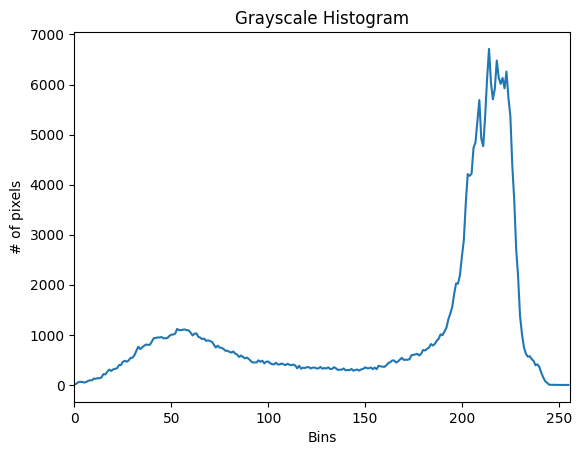

In [7]:
gray_hist = cv.calcHist([gray], [0], None, [256], [0,256])


plt.figure()
plt.title('Grayscale Histogram')
plt.xlabel('Bins')
plt.ylabel('# of pixels')
plt.plot(gray_hist)
plt.xlim([0,256])
plt.show()

### Using masks to a better analysis

In [3]:
blank = np.zeros(img.shape[:2], dtype='uint8')

circle = cv.circle(blank, (img.shape[1]//2, img.shape[0]//2), 100, 255, -1)
cv.imshow('Mask', mask)

mask = cv.bitwise_and(gray, gray, mask=circle)

gray_hist = cv.calcHist([gray], [0], mask, [256], [0,256])

plt.figure()
plt.title('Grayscale Histogram')
plt.xlabel('Bins')
plt.ylabel('# of pixels')
plt.plot(gray_hist)
plt.xlim([0,256])
plt.show()

cv.waitKey(0)

NameError: name 'mask' is not defined

### Color Histogram

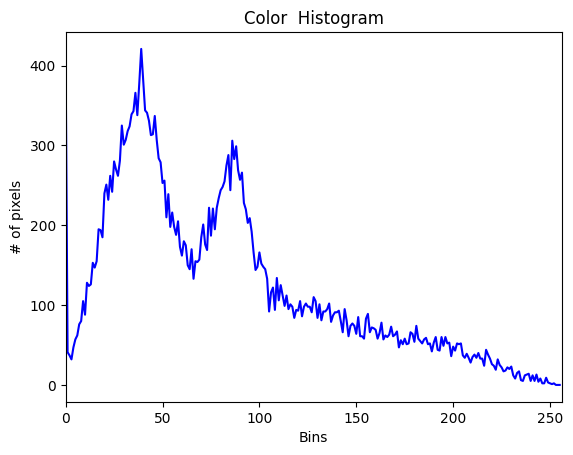

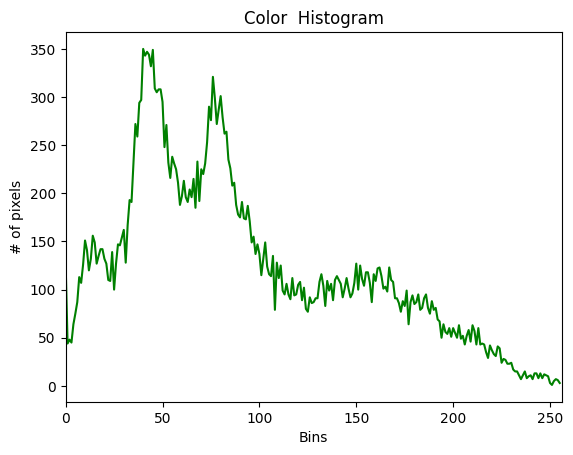

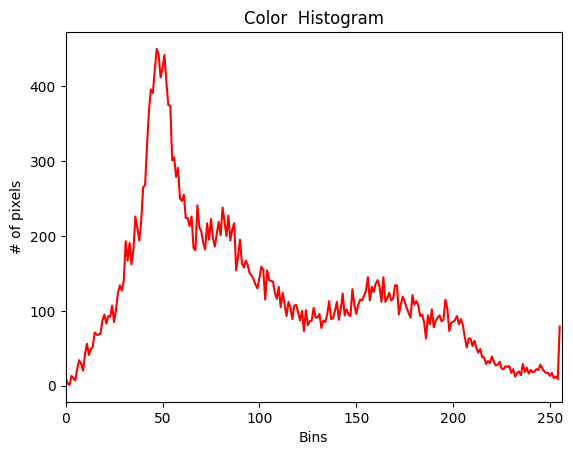

In [7]:
colors = ('b', 'g', 'r')
for i, col in enumerate(colors):
    hist = cv.calcHist([img], [i], circle, [256], [0,256])
    
    plt.figure()
    plt.title('Color  Histogram')
    plt.xlabel('Bins')
    plt.ylabel('# of pixels')
    plt.plot(hist, color=col)
    plt.xlim([0,256])
    plt.show()


---

---

# Thresholding / Binarizing images

#### Importaciones

In [8]:
import cv2 as cv
#import numpy as np
#import matplotlib.pyplot as plt

In [9]:
img = cv.imread('Resources/Photos/cats.jpg')
cv.imshow('Cats', img)

cv.waitKey(0)

-1

In [10]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow('Gray', gray)

cv.waitKey(0)

-1

## Simple thresholding

In [12]:
threshold, thresh = cv.threshold(gray, 150, 255, cv.THRESH_BINARY) # Todo pixel que sea mayor a 150 se va a 225
cv.imshow('Simple threshold', thresh)

cv.waitKey(0)

-1

In [13]:
threshold, thresh_inv = cv.threshold(gray, 150, 255, cv.THRESH_BINARY_INV) # Todo pixel que sea menor a 150 se va a 225
cv.imshow('Simple threshold', thresh_inv)

cv.waitKey(0)

-1

# Adaptative Thresholding
El computador encuentra por si mismo el valor optimo del thresholding

In [16]:
adaptive_thresh = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 1) 
cv.imshow('Adaptive threshold', adaptive_thresh)

cv.waitKey(0)

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1680: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'
